In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2023-02-16 16:50:29.668803


# Matplotlib - osa 2
## Usean arvosarjan pylväskaavio

Tämä on jatkoa sarjan ensimmäiselle osalle https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb. Oletan ensimmäisen osan asioiden olevan lukijalle tuttuja.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Lasken eri koulutuksen suorittaneiden lukumäärät sukupuolen mukaan
df1 = pd.crosstab(df['koulutus'], df['sukup'])

koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df1.index = koulutus

# Kikkailen n-arvot otsikoihin
miehet = 'Mies, n = ' + str(df1[1].sum())
naiset = 'Nainen, n = ' + str(df1[2].sum())
sukup = [miehet, naiset]
df1.columns = sukup

df1

,"Mies, n = 62","Nainen, n = 19"
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


## Vaakapylväskaavio

Dataframen riveistä tulee luokka-akselin luokat/kategoriat (koulutus) ja sarakkeista arvosarjat (sukupuoli). Jos haluat vaihtaa luokka-akselin luokat ja arvosarjat, niin transponoi dataframe **T**-toiminnolla: `df1.T.plot.barh()`

Text(0.5, 0, 'Lukumäärä')

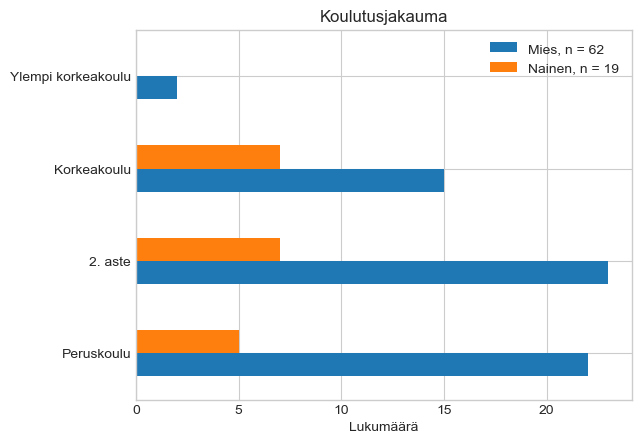

In [5]:
df1.plot.barh()

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

## Hienosäätöä

Parametri **width** muuttaa pylvään paksuutta ja samalla pylväiden välissä olevaa tyhjää tilaa. Arvo 0 häivyttää pylväät ja arvo 1 laittaa pylväät kiinni toisiinsa.

Parametri **legend='reverse'** kääntää selitteen järjestyksen. Käännetty järjestys on tässä tapauksessa havainnollisempi.

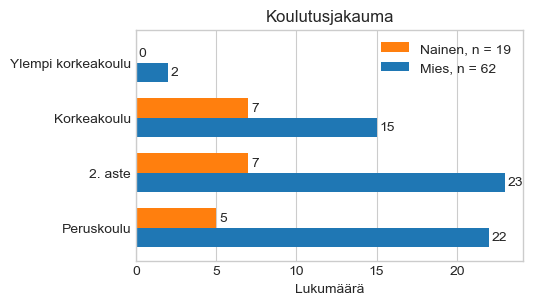

In [6]:
ax = df1.plot.barh(figsize=(5, 3), legend='reverse', width=0.7)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, padding=2)

## Pystypylväskaavio

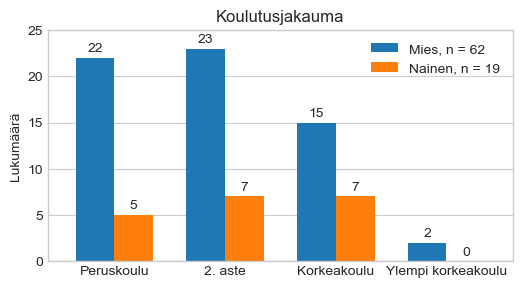

In [7]:
ax = df1.plot.bar(figsize=(6, 3), rot=0, width=0.7)

plt.title('Koulutusjakauma')
plt.ylabel('Lukumäärä')

plt.grid(axis='x')
plt.ylim(0, 25)

for container in ax.containers:
    ax.bar_label(container, padding=2)

## Pinottu (stacked) pylväskaavio

Pinottu pylväskaavio (**stacked=True**) näyttää arvosarjat samassa pylväässä, jolloin kokonaismäärä on helposti nähtävissä pylvään kokonaispituutena.

Jos pinottujen pylväiden päälle halutaan lisätä lukuarvot, niin yksi tapa on käyttää **patches**-kokoelmaa, joka sisältää pylväitä kuvaavat suorakulmiot. Suorakulmion mitat saan **get_bbox**-funktiolla. Huomaa, että mahdolliset nollat täytyy blokata pois.

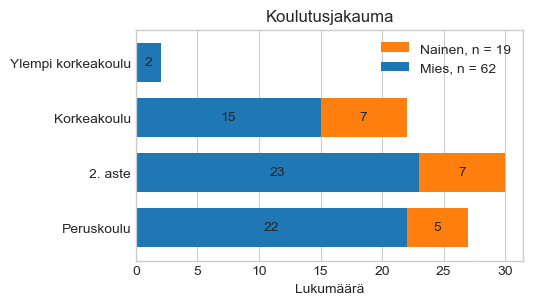

In [8]:
ax = df1.plot.barh(figsize=(5, 3), legend='reverse', stacked=True, width=0.7)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

plt.grid(axis='y')

for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width>0:
        label = '{:.0f}'.format(width)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')

## Prosentit pinottuna (stacked) pylväskaaviona

In [9]:
# Lasken prosenttitaulukon
df2 = pd.crosstab(df['sukup'], df['koulutus'], normalize='index')*100

df2.index = sukup
df2.columns = koulutus
df2

,Peruskoulu,2. aste,Korkeakoulu,Ylempi korkeakoulu
"Mies, n = 62",35.483871,37.096774,24.193548,3.225806
"Nainen, n = 19",26.315789,36.842105,36.842105,0.000000


Selite ei aina automaattisesti osu mieleiseen paikkaan. Seuraavassa tuunaan selitettä **legend**-funktiolla:
* **ncol**-parametrilla lisään selitteen sarakkeiden määräksi 4, jolloin saan koulutukset vierekkäin.
* Muutamien kokeilujen jälkeen päädyin sijoittamaan selitteen sijaintiin (-0.10, -0.2). Koordinaatiston (0, 0) on kaavion vasemmassa alakulmassa ja (1, 1) on kaavion oikeassa yläkulmassa.
* Lue lisää selitteen muotoilusta: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

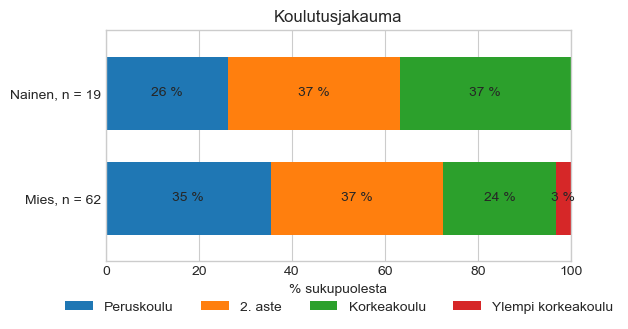

In [10]:
ax = df2.plot.barh(width=0.7, stacked=True, figsize=(6,3))

plt.title('Koulutusjakauma')
plt.xlabel('% sukupuolesta')

plt.grid(axis='y')
plt.xlim(0, 100)

plt.legend(loc=(-0.10, -0.25), ncol=4)

for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width>0:
        label = '{:.0f} %'.format(width)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')

## Lisätietoa

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib3.ipynb käsittelee **histogrammia**